In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

In [2]:
dfA = pd.read_csv('data/semeval_train_A.txt', sep="\t", header=None, names=['ttext', 'sentiment'])
dfB = pd.read_csv('data/semeval_train_B.txt', sep="\t", header=None, names=['ttext', 'topic', 'sentiment'])
dfC = pd.read_csv('data/semeval_train_C.txt', sep="\t", header=None, names=['ttext', 'topic', 'point'])

In [3]:
dfA.head()

,ttext,sentiment
0,dec 21st 2012 will be know not as the end of t...,neutral
1,"@MacMiller hate my life, because i can't see y...",negative
2,Checked out Our Lady Peace at Bluesfest tonigh...,positive
3,Hello from the Foundation Trekkers! We're up i...,positive
4,Tomorrow we will be proud to play at the Remem...,positive


In [4]:
dfB.head()

,ttext,topic,sentiment
0,I just cut a 25 second audio clip of Aaron Rod...,aaron rodgers,neutral
1,"@Espngreeny I'm a Fins fan, it's Friday, and A...",aaron rodgers,negative
2,Aaron Rodgers is really catching shit for the ...,aaron rodgers,positive
3,If you think the Browns should or will trade ...,aaron rodgers,neutral
4,Green Bay Packers: Five keys to defeating the...,aaron rodgers,neutral


In [5]:
dfC.head()

,ttext,topic,point
0,05 Beat it - Michael Jackson - Thriller (25th ...,michael jackson,0
1,Jay Z joins Instagram with nostalgic tribute t...,michael jackson,1
2,Michael Jackson: Bad 25th Anniversary Edition ...,michael jackson,0
3,18th anniv of Princess Diana's death. I still ...,michael jackson,1
4,@oridaganjazz The 1st time I heard Michael Jac...,michael jackson,2


In [6]:
dfA.info()
print('-' * 40)
dfB.info()
print('-' * 40)
dfC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11578 entries, 0 to 11577
Data columns (total 2 columns):
ttext        11578 non-null object
sentiment    11578 non-null object
dtypes: object(2)
memory usage: 181.0+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7793 entries, 0 to 7792
Data columns (total 3 columns):
ttext        7793 non-null object
topic        7793 non-null object
sentiment    7793 non-null object
dtypes: object(3)
memory usage: 182.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7934 entries, 0 to 7933
Data columns (total 3 columns):
ttext    7934 non-null object
topic    7934 non-null object
point    7934 non-null int64
dtypes: int64(1), object(2)
memory usage: 186.0+ KB


In [7]:
dfA.describe()

,ttext,sentiment
count,11578,11578
unique,11519,3
top,Perseverance is failing 19 times and succeedin...,positive
freq,6,5596


In [8]:
dfB.describe()

,ttext,topic,sentiment
count,7793,7793,7793
unique,7752,274,4
top,Perseverance is failing 19 times and succeedin...,bob marley,positive
freq,6,81,5268


In [9]:
dfC.describe()

,point
count,7934.000000
mean,0.475674
std,0.839045
min,-2.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,2.000000


In [10]:
dfC.describe(include=['O'])

,ttext,topic
count,7934,7934
unique,7893,100
top,"@MCPEsuggestions got Amazon last Thursday, got...",tgif
freq,3,93


## Visualization

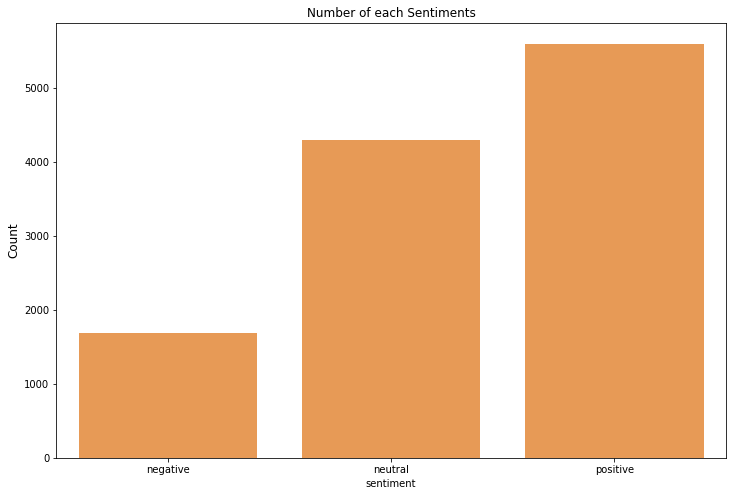

In [11]:
data = dfA.groupby(['sentiment'], as_index=False).count()

plt.figure(figsize=(12,8))
sns.barplot(data['sentiment'], data['ttext'], alpha=0.8, color=color[1])
plt.title('Number of each Sentiments', fontsize=12)
plt.ylabel('Count', fontsize=12)

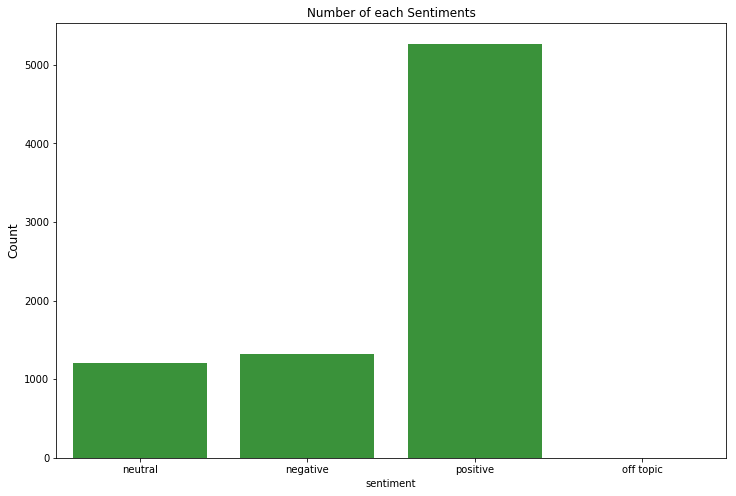

In [12]:
plt.figure(figsize=(12,8))
sns.countplot(x="sentiment", data=dfB[['topic', 'sentiment']], color=color[2])
plt.title('Number of each Sentiments', fontsize=12)
plt.ylabel('Count', fontsize=12)

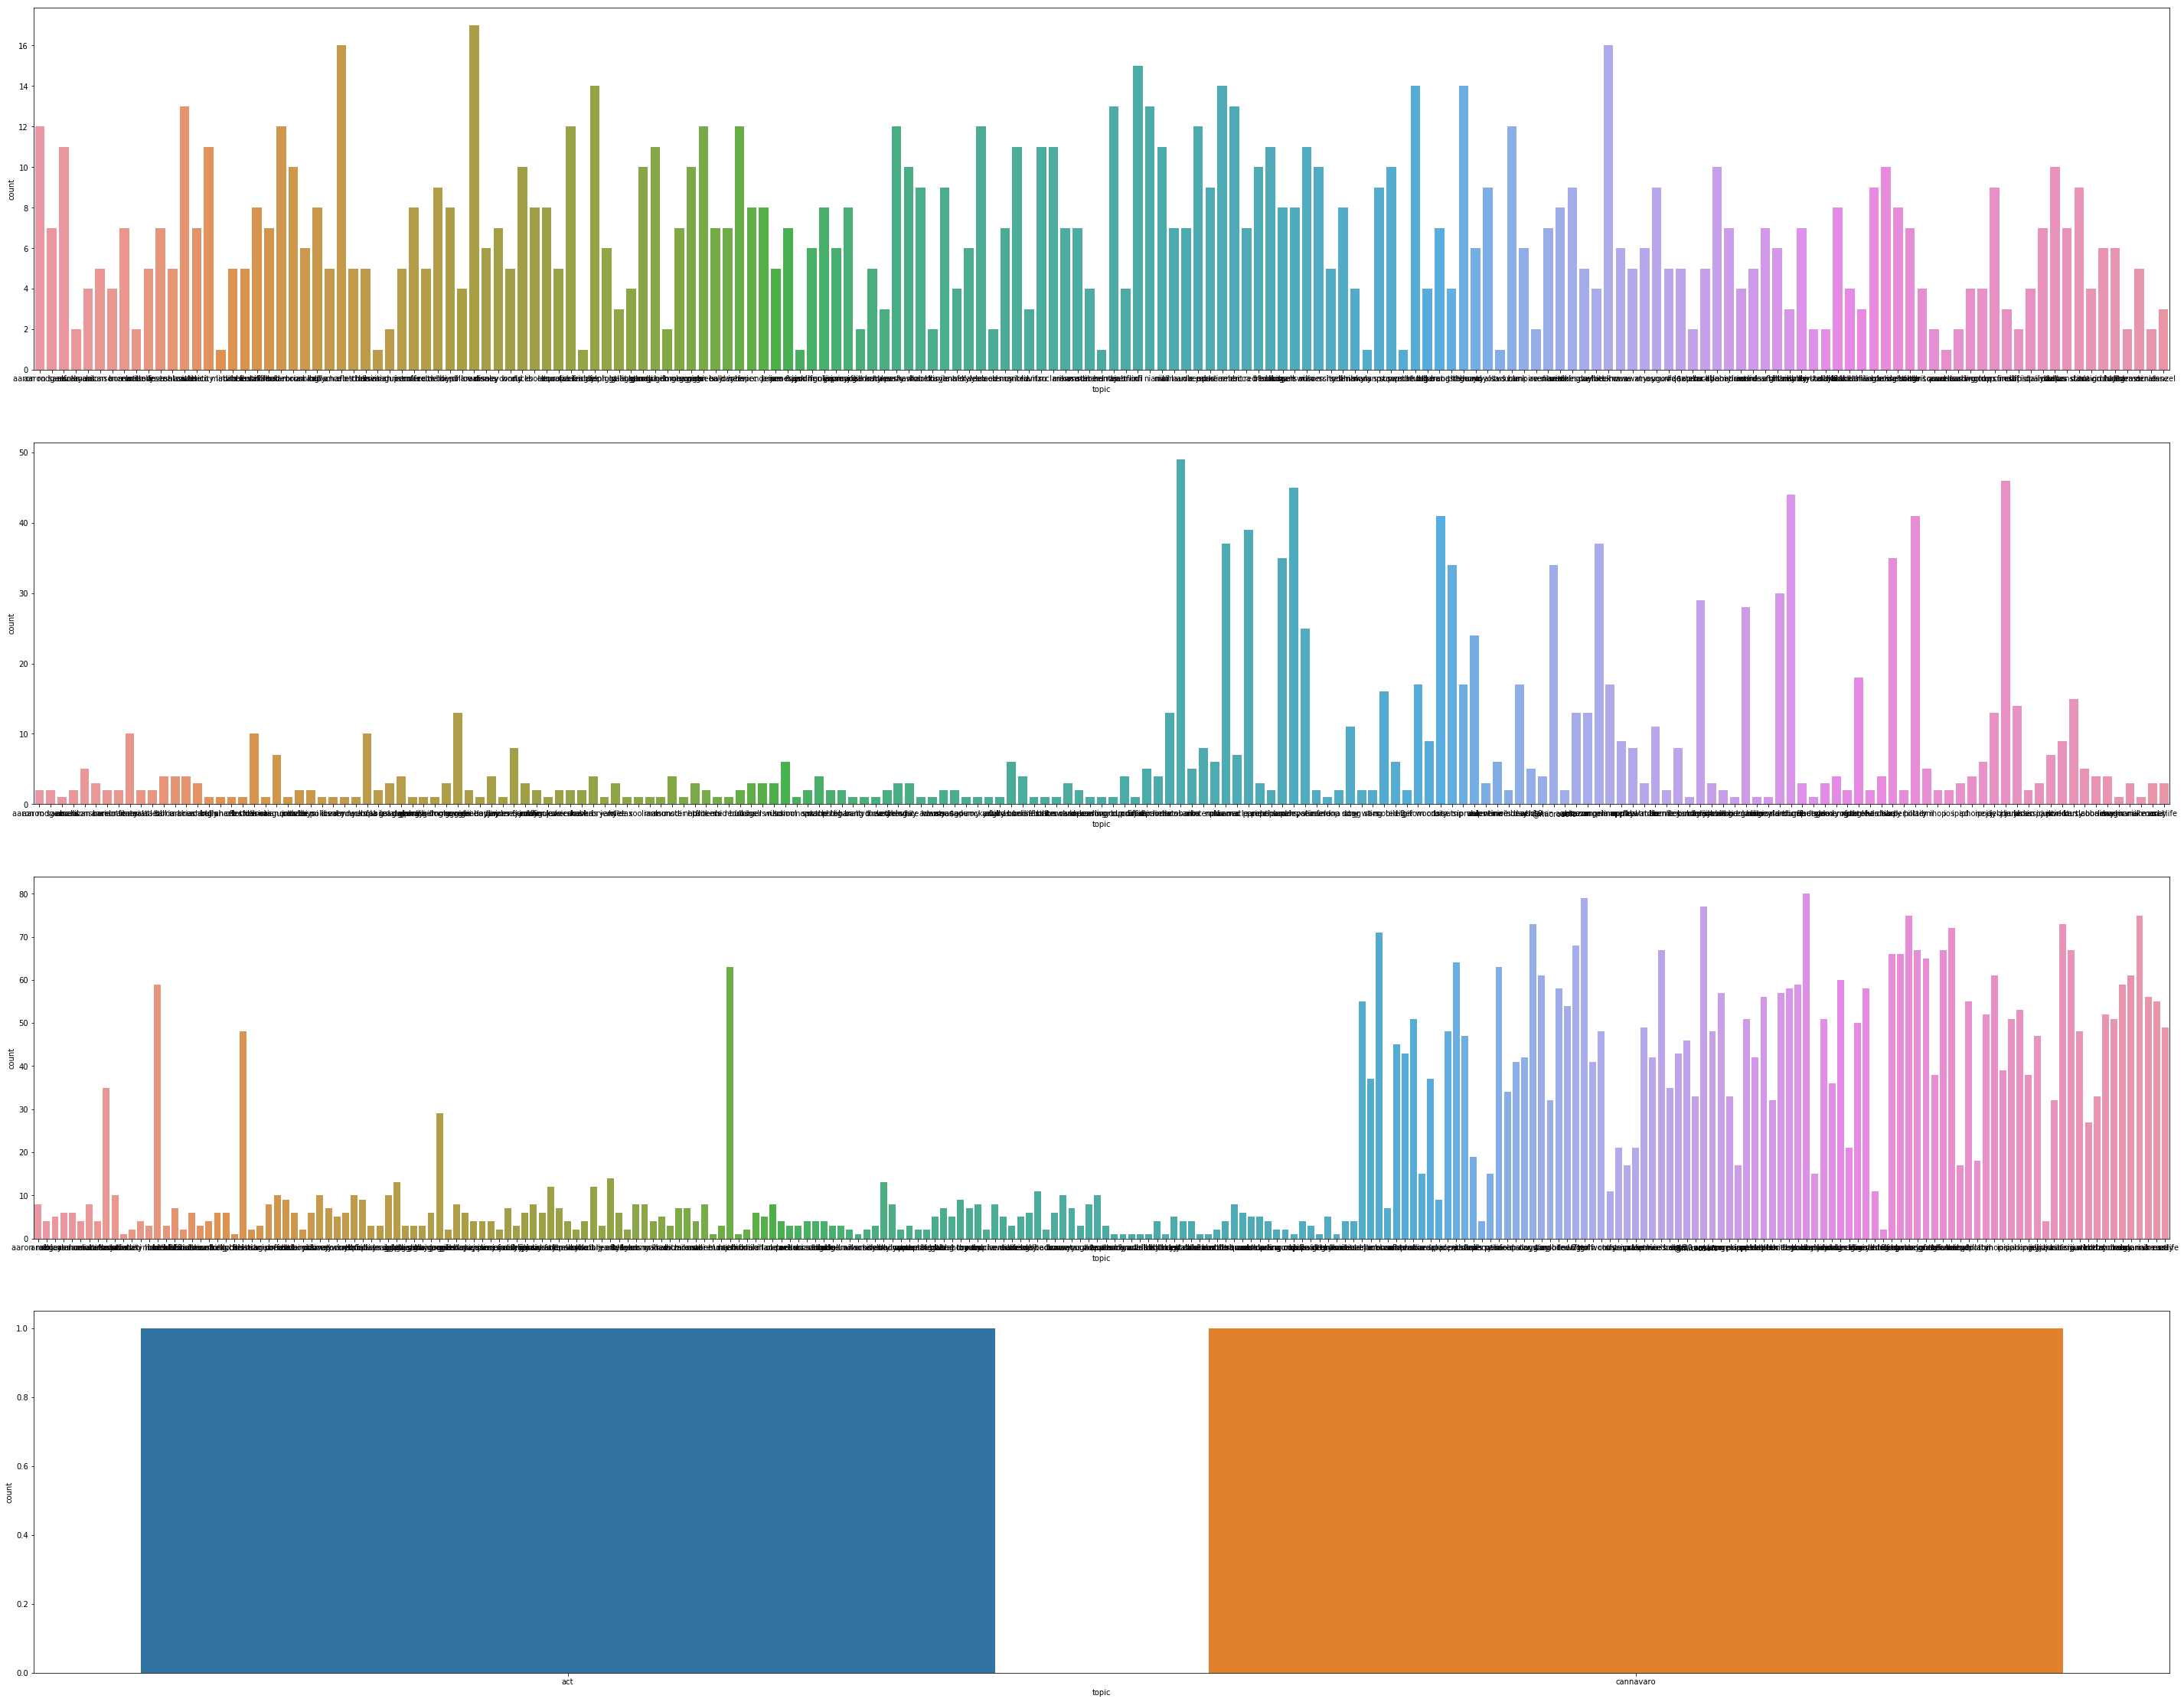

In [13]:
topics = dfB['sentiment'].unique()

f, axes = plt.subplots(4, 1, figsize=(50, 40))
for i in range(len(topics)):
    sns.countplot(x='topic', data=dfB[dfB['sentiment'] == topics[i]], ax=axes[i])

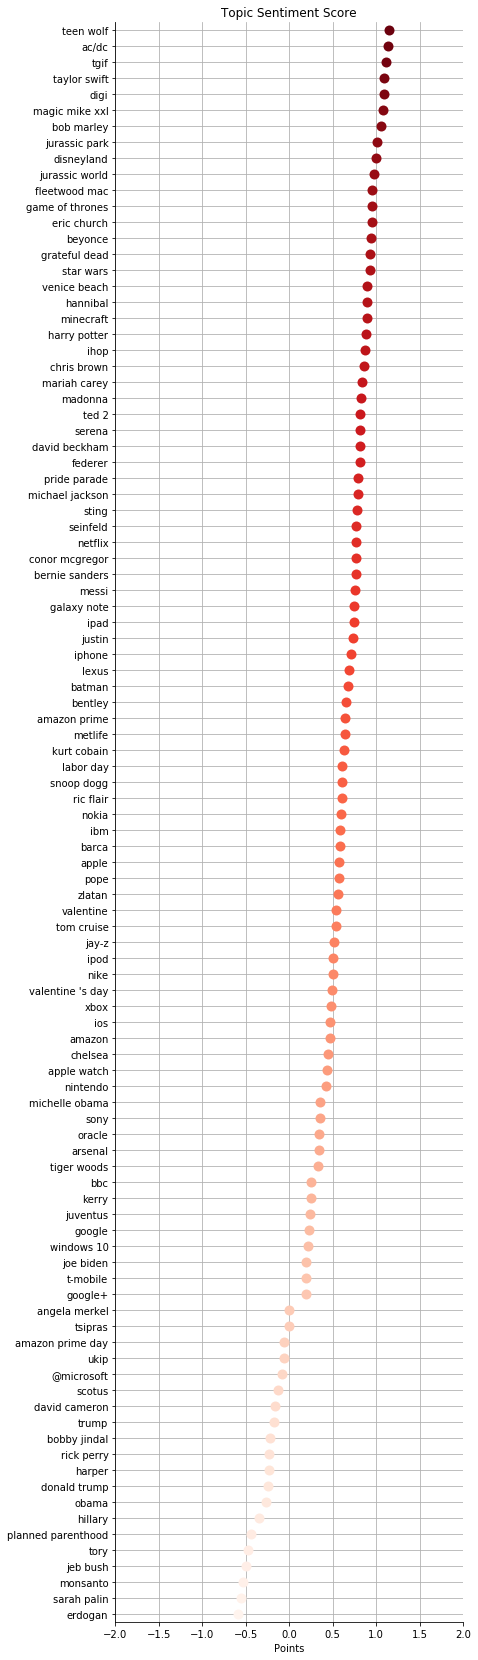

In [14]:
data = dfC[['topic', 'point']].groupby(['topic'], as_index=False).mean().sort_values('point', ascending=False)

g = sns.PairGrid(data,
                 x_vars=['point'], y_vars=['topic'],
                size=23, aspect=.25)
g.map(sns.stripplot, size=10, orient='h',
             palette='Reds_r', edgecolor='gray')
g.set(xlim=(-2, 2), xlabel='Points', ylabel='')

title = ['Topic']
ax = g.axes.flat[0]
ax.xaxis.grid(True)
ax.yaxis.grid(True)
ax.set(title="Topic Sentiment Score")